## Correlation Analysis: Concepts and Applications

- Correlation analysis is a statistical method used to evaluate the strength and direction of the linear relationship between two variables. There are different types of correlation coefficients, and each has its own properties and applications. 
- In this video, I'll cover the 
    - Pearson correlation coefficient, 
    - Kendall rank correlation coefficient, 
    - Spearman correlation coefficient, and 
    - the Point-Biserial correlation coefficient.
    
    
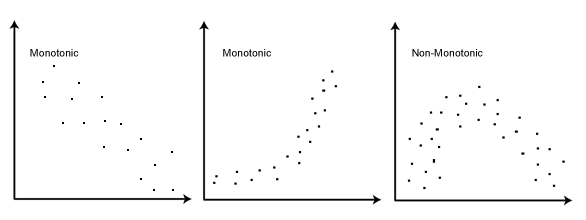
https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

### 1. Pearson Correlation Coefficient:
- The Pearson correlation coefficient measures the linear relationship between two continuous variables. 
- It ranges from -1 to 1, where:

    - 1 indicates a perfect positive linear relationship,
    - 0 indicates no linear relationship,
    - -1 indicates a perfect negative linear relationship.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import pearsonr, kendalltau, spearmanr, pointbiserialr

In [58]:
data = pd.read_csv('SalesPredictData.csv')

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [59]:
pearson_corr = pearsonr(data['TV'], data['Sales'])
pearson_corr

PearsonRResult(statistic=0.9012079133023309, pvalue=7.92791162531942e-74)

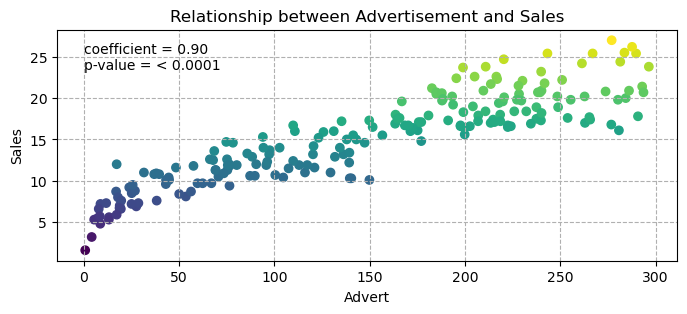

In [75]:
plt.figure(figsize=(8,3))
plt.scatter(data['TV'], data['Sales'], c=data['Sales'])
plt.xlabel('Advert')
plt.ylabel('Sales')
plt.grid(linestyle='--')
plt.title('Relationship between Advertisement and Sales')
plt.text(0,23.5, 'coefficient = 0.90\np-value = < 0.0001')
#plt.savefig('correlation_figure.png', dpi=150, bbox_inches='tight')
plt.show()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# Load the data
data = pd.read_csv('SalesPredictData.csv')

# Check the data
data.head()

In [44]:
# Calculate Pearson correlation
pearson_corr = data[['TV', 'Sales']].corr(method='pearson')

pearson_corr

,TV,Sales
TV,1.000000,0.901208
Sales,0.901208,1.000000


<Axes: xlabel='TV', ylabel='Sales'>

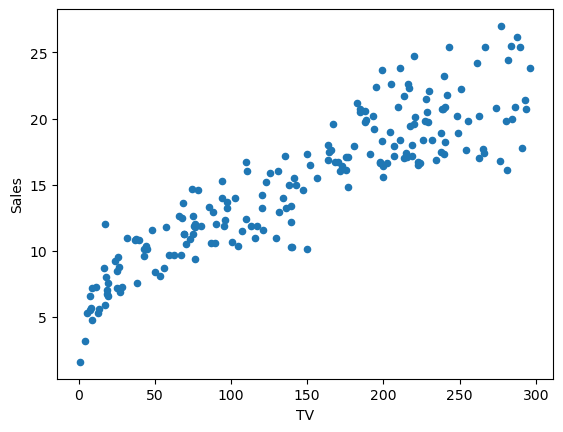

In [45]:
data[['TV', 'Sales']].plot(kind='scatter', x='TV', y= 'Sales')

In [46]:
# p-value
pearson_pvalue = pearsonr(data['TV'], data['Sales'])
pearson_pvalue

PearsonRResult(statistic=0.9012079133023309, pvalue=7.92791162531942e-74)

### 2. Kendall Rank Correlation Coefficient:
- The Kendall rank correlation coefficient assesses the strength and direction of the monotonic relationship between two variables. 
- It's more robust to outliers than Pearson correlation.

In [63]:
kendall_corr = kendalltau(data['TV'], data['Sales'])
kendall_corr

SignificanceResult(statistic=0.7279944953129899, pvalue=1.3340700477115128e-52)

In [47]:
# Calculate Kendall correlation
kendall_corr = data[['TV', 'Sales']].corr(method='kendall')

kendall_corr

,TV,Sales
TV,1.000000,0.727994
Sales,0.727994,1.000000


In [48]:
# p-value
pearson_pvalue = kendalltau(data['TV'], data['Sales'])
pearson_pvalue

SignificanceResult(statistic=0.7279944953129899, pvalue=1.3340700477115128e-52)

### 3. Spearman Rank Correlation Coefficient:
- Similar to Kendall, Spearman correlation evaluates the monotonic relationship between two variables. 
- It's also less sensitive to outliers compared to Pearson correlation.

In [64]:
spearman_corr = spearmanr(data['TV'], data['Sales'])
spearman_corr

SignificanceResult(statistic=0.9009956366533672, pvalue=9.699391979586503e-74)

In [49]:
# p-value
pearson_pvalue = spearmanr(data['TV'], data['Sales'])
pearson_pvalue

SignificanceResult(statistic=0.9009956366533672, pvalue=9.699391979586503e-74)

### 4. Point-Biserial Correlation Coefficient:
- The Point-Biserial correlation coefficient measures the relationship between a binary variable and a continuous variable.

In [65]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [66]:
data['binary_sales'] = pd.cut(data['Sales'], bins=2, labels=[1,0])
data.head()

,TV,Radio,Newspaper,Sales,binary_sales
0,230.1,37.8,69.2,22.1,0
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,12.0,1
3,151.5,41.3,58.5,16.5,0
4,180.8,10.8,58.4,17.9,0


In [67]:
biserial_corr = pointbiserialr(data['Sales'], data['binary_sales'])
biserial_corr

SignificanceResult(statistic=-0.8439698483918485, pvalue=1.8328698901662217e-55)

In [55]:
data['binary_no'] = pd.cut(data['Sales'], bins=2, labels=[1,0])

data['binary_no'].value_counts()

0    113
1     87
Name: binary_no, dtype: int64

In [56]:
pb_corr, p_value = pointbiserialr(data['binary_no'], data['Sales'])

print(pb_corr, p_value)

-0.8439698483918485 1.8328698901662217e-55


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your time series
autocorr = np.correlate(data, data, mode='full')

# Plot autocorrelation function
plt.plot(autocorr[len(autocorr)//2:])
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

### Advanced Correlation Analysis

Cross-correlation and autocorrelation are statistical techniques used to analyze the relationship between signals, time series, or sequences.

Autocorrelation:
Autocorrelation measures the similarity between a signal and a delayed (lagged) version of itself. It helps identify repeating patterns or cycles within a time series.

Mathematically, the autocorrelation function (ACF) at lag 
�
k is defined as: